In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
nq

10

In [4]:
Delta = 0.5
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (0.5) [Z0 Z1]
+ (0.5) [Z1 Z2]
+ (0.5) [Z2 Z3]
+ (0.5) [Z3 Z4]
+ (0.5) [Z4 Z5]
+ (0.5) [Z5 Z6]
+ (0.5) [Z6 Z7]
+ (0.5) [Z7 Z8]
+ (0.5) [Z8 Z9]
+ (0.5) [Z9 Z0]
+ (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]


In [5]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [8]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -1.990092479854718
Cost at Step 4: -5.650202140850024
Cost at Step 6: -10.516994597338048
Cost at Step 8: -9.629430484837105
Cost at Step 10: -9.950367479414915
Cost at Step 12: -13.140993138514691
Cost at Step 14: -12.990950676835716
Cost at Step 16: -13.293885687213516
Cost at Step 18: -13.511701685481164
Cost at Step 20: -13.670190336347474
Cost at Step 22: -13.886822518953595
Cost at Step 24: -13.987533785689582
Cost at Step 26: -14.307029881443036
Cost at Step 28: -14.347994827274881
Cost at Step 30: -14.490144438166107
Cost at Step 32: -14.496199741556703
Cost at Step 34: -14.563243263784123
Cost at Step 36: -14.53703557683961
Cost at Step 38: -14.717654105703836
Cost at Step 40: -14.698563975490671
Cost at Step 42: -14.72206500004979
Cost at Step 44: -14.781449880212376
Cost at Step 46: -14.798368430677545
Cost at Step 48: -14.835780329847276
Cost at Step 50: -14.857778122670334
Cost at Step 52: -14.896644049654634
Cost at Step 54: -14.962523852353508
Cost at Ste

In [11]:
print(best_cost)

NameError: name 'best_cost' is not defined

In [8]:
print(cost_fn(best_params))

-15.230043742972958


In [9]:
print(np.array(best_params))

[2.46800458 3.32720662 2.40292534 3.28470271 2.48510021 3.31835594
 2.06488753 2.69561779 2.85903815 2.75011433 4.06721415 2.97871524
 2.77844624 2.95031146 3.41403531 3.17704528 1.02539584 3.41557705
 2.93639471 3.12390106]


In [7]:
best_params=[2.46800458, 3.32720662, 2.40292534, 3.28470271, 2.48510021, 3.31835594,
 2.06488753, 2.69561779, 2.85903815, 2.75011433, 4.06721415, 2.97871524,
 2.77844624, 2.95031146, 3.41403531, 3.17704528, 1.02539584, 3.41557705,
 2.93639471, 3.12390106]

In [10]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.544111997913572
2 0.12874876149963038
3 0.13827994622156597
4 0.06361116586068954
5 0.09010186385750332
6 0.06361116586068971
7 0.11965425194604076
8 0.12874876149963088
9 0.49257179478195723


In [13]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.3084252290570266
1 -0.30858017137281435
2 -0.30871485108025376
3 -0.3088292318695479
4 -0.30892328096742233
5 -0.30899696914818564
6 -0.3090502707439591
7 -0.30908316365407074
8 -0.30909562935361
9 -0.30908765290114215
10 -0.309059222945575
11 -0.3090103317321756
12 -0.30894097510773866
13 -0.30885115252489725
14 -0.3087408670455777
15 -0.30861012534359655
16 -0.30845893770639427
17 -0.3082873180359087
18 -0.30809528384858303
19 -0.3078828562745093
20 -0.3076500600557063
21 -0.30739692354352904
22 -0.3071234786952125
23 -0.30682976106954885
24 -0.30651580982169324
25 -0.306181667697109
26 -0.30582738102464185
27 -0.3054529997087295
28 -0.30505857722074886
29 -0.30464417058949655
30 -0.3042098403908122
31 -0.3037556507363394
32 -0.3032816692614294
33 -0.3027879671121897
34 -0.30227461893168184
35 -0.3017417028452667
36 -0.3011893004451043
37 -0.30061749677381167
38 -0.3000263803072788
39 -0.2994160429366509
40 -0.2987865799494766
41 -0.29813809001003067
42 -0.29747067513881154
43 -

334 -0.031690195707622826
335 -0.03193612008623645
336 -0.032186178894759915
337 -0.032440257890932994
338 -0.03269824366143434
339 -0.03296002365140932
340 -0.033225486193505405
341 -0.033494520536409444
342 -0.03376701687287453
343 -0.0340428663672353
344 -0.03432196118239955
345 -0.03460419450631266
346 -0.03488946057788653
347 -0.03517765471238732
348 -0.03546867332627565
349 -0.03576241396149335
350 -0.036058775309189856
351 -0.03635765723288567
352 -0.03665896079106459
353 -0.0369625882591893
354 -0.03726844315113895
355 -0.03757643024005963
356 -0.03788645557862741
357 -0.038198426518715856
358 -0.03851225173046677
359 -0.038827841220757775
360 -0.0391451063510678
361 -0.039463959854729586
362 -0.039784315853574226
363 -0.04010608987395847
364 -0.040429198862175664
365 -0.04075356119924631
366 -0.04107909671508622
367 -0.04140572670205095
368 -0.041733373927852924
369 -0.04206196264785203
370 -0.04239141861671655
371 -0.04272166909945291
372 -0.04305264288180591
373 -0.043384270

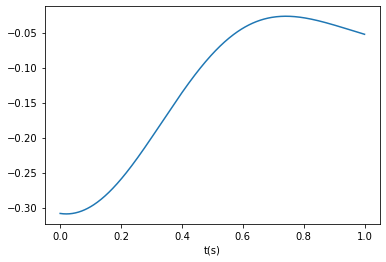

In [18]:
plt.xlabel('t(s)')
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [20]:
np.array(corr_t)

tensor([-0.30842523, -0.30858017, -0.30871485, -0.30882923, -0.30892328,
        -0.30899697, -0.30905027, -0.30908316, -0.30909563, -0.30908765,
        -0.30905922, -0.30901033, -0.30894098, -0.30885115, -0.30874087,
        -0.30861013, -0.30845894, -0.30828732, -0.30809528, -0.30788286,
        -0.30765006, -0.30739692, -0.30712348, -0.30682976, -0.30651581,
        -0.30618167, -0.30582738, -0.305453  , -0.30505858, -0.30464417,
        -0.30420984, -0.30375565, -0.30328167, -0.30278797, -0.30227462,
        -0.3017417 , -0.3011893 , -0.3006175 , -0.30002638, -0.29941604,
        -0.29878658, -0.29813809, -0.29747068, -0.29678444, -0.2960795 ,
        -0.29535595, -0.29461392, -0.29385353, -0.29307489, -0.29227814,
        -0.29146339, -0.29063079, -0.28978045, -0.28891254, -0.28802717,
        -0.2871245 , -0.28620467, -0.28526783, -0.28431414, -0.28334375,
        -0.28235681, -0.2813535 , -0.28033396, -0.27929837, -0.2782469 ,
        -0.27717972, -0.276097  , -0.27499892, -0.2